# Quantium Data Analytics Virtual Experience

## Task 1: Data Preparation and Customer Analytics

### Background

Quantium has had a data partnership with a large supermarket brand for the last few years who provide transactional and customer data. You are an analyst within the Quantium analytics team and are responsible for delivering highly valued data analytics and insights to help the business make strategic decisions.

Supermarkets will regularly change their store layouts, product selections, prices and promotions. This is to satisfy their customer’s changing needs and preferences, keep up with the increasing competition in the market or to capitalise on new opportunities. The Quantium analytics team are engaged in these processes to evaluate and analyse the performance of change and recommend whether it has been successful.

In this program you will learn key analytics skills such as:

- Data wrangling
- Data visualization
- Programming skills
- Statistics
- Critical thinking
- Commercial thinking

### Task Description

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region. <br>
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

#### Load Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading purchase data
purch_data = pd.read_csv('QVI_purchase_behaviour.csv')

# loading transaction data
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
purch_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


#### Data Cleaning and Preparation

The date column in *transaction_data* is in integer form. Let's change this to a proper date format.

In [7]:
import datetime as dt
transaction_data['DATE'] = pd.TimedeltaIndex(transaction_data['DATE'], 
                                             unit = 'd') + dt.datetime(1899, 12, 30)

In [8]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
# find the total types of products sold

unique_prod = transaction_data['PROD_NAME'].unique()
print(len(unique_prod))

114


In [10]:
transaction_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

The product names contains special characters and is merged together with the packaging size. Let's clean and split them up.

In [11]:
# import regex module

import re

# remove special characters
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'[^\w]', ' ')

# split packaging size
transaction_data['PROD_NAME_SPLIT'] = transaction_data['PROD_NAME'].apply(lambda x: re.split('(\d+)', x))

In [12]:
transaction_data['PROD_NAME_SPLIT'].head()

0      [Natural Chip        Compny SeaSalt, 175, g]
1                    [CCs Nacho Cheese    , 175, g]
2      [Smiths Crinkle Cut  Chips Chicken , 170, g]
3      [Smiths Chip Thinly  S Cream Onion , 175, g]
4    [Kettle Tortilla ChpsHny Jlpno Chili , 150, g]
Name: PROD_NAME_SPLIT, dtype: object

In [13]:
# split the product name into a list of strings

for i in range(len(transaction_data['PROD_NAME_SPLIT'])):
    item = transaction_data['PROD_NAME_SPLIT'][i]
    item[0] = item[0].split()

In [14]:
# extract packaging size and store it in another column
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME_SPLIT'].str[1].astype('float')

# extract cleaned product names
transaction_data['PROD_NAME_SPLIT'] = transaction_data['PROD_NAME_SPLIT'].str[0]

In [15]:
transaction_data['PACK_SIZE'].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [16]:
transaction_data['PROD_NAME_SPLIT'].head()

0             [Natural, Chip, Compny, SeaSalt]
1                         [CCs, Nacho, Cheese]
2       [Smiths, Crinkle, Cut, Chips, Chicken]
3      [Smiths, Chip, Thinly, S, Cream, Onion]
4    [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
Name: PROD_NAME_SPLIT, dtype: object

In [17]:
# finding most common words

# initialising
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
transaction_data['PROD_NAME_SPLIT'].apply(lambda line: count_words(line))

print(pd.Series(word_counts).sort_values(ascending = False))

Chips       49770
Kettle      41288
Smiths      28860
Cheese      27890
Pringles    25102
            ...  
Whlegrn      1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 197, dtype: int64


Not suprisingly, chips is the most common word!

In [18]:
# removing salsa products from our list

transaction_data[
                'PROD_NAME_SPLIT'] = transaction_data[
                'PROD_NAME_SPLIT'][~transaction_data[
                'PROD_NAME_SPLIT'].str.contains(r'[Ss]alsa', na = False)]

In [19]:
# checking total transactions after removing salsa products

print(len(transaction_data['PROD_NAME_SPLIT']))

264836


It seems like there were no salsa products in the list in the first place as the number of transactions is still the same. We can do another check to confirm this.

In [20]:
# split the product name into individual columns

test_salsa = pd.DataFrame(transaction_data['PROD_NAME_SPLIT'].tolist(), 
                          index = transaction_data.index)

In [21]:
test_salsa.head()

,0,1,2,3,4,5,6,7
0,Natural,Chip,Compny,SeaSalt,None,None,None,None
1,CCs,Nacho,Cheese,None,None,None,None,None
2,Smiths,Crinkle,Cut,Chips,Chicken,None,None,None
3,Smiths,Chip,Thinly,S,Cream,Onion,None,None
4,Kettle,Tortilla,ChpsHny,Jlpno,Chili,None,None,None


In [22]:
# check for salsa products

for i in range(8):
    salsa_count = test_salsa[i].str.contains(r'[Ss]alsa').sum()
    
    if salsa_count > 0:    
        print('There are salsa products in the list.')
        
    else:
        print('There are no salsa products in the list.')

There are no salsa products in the list.
There are salsa products in the list.
There are salsa products in the list.
There are salsa products in the list.
There are salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.
There are no salsa products in the list.


Now we can confirm there were no salsa products in the original list!

In [23]:
# statistical summary of transaction_data

transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


It seems that there is likely an outlier as the max value for PROD_QTY is 200 while its median is 2. Let's look at the purchases made by this customer.

In [24]:
# extracting transactions where PROD_QTY is 200

transaction_data[transaction_data['PROD_QTY'] == 200].copy()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0


There were only 2 transactions with PROD_QTY of 200 and it was made my the same customer (LYLTY_CARD_NBR: 226000). Let's see if this customer made other purchases.

In [25]:
# extracting transactions where made by LYLTY_CARD_NBR: 226000

transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000].copy()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,"[Dorito, Corn, Chp, Supreme]",380.0


As this customer only made 2 purchases and both of them with PROD_QTY of 200, we can conclude that this is an outlier and remove them from our list.

In [26]:
# removing transactions made by LYLTY_CARD_NBR: 226000

transaction_data.drop(transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000].index, 
                      inplace = True)

In [27]:
# check the resulting dataset shape

transaction_data.shape

(264834, 10)

In [28]:
# number of transactions made per day

transaction_data.groupby('DATE')['TXN_ID'].count()

DATE
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: TXN_ID, Length: 364, dtype: int64

The data is for 1 year from 01-Jul-2018 to 30-Jun-2019. <br>
We only have 364 days, meaning that 1 day is missing. Let's find out the missing date.

In [29]:
# find missing date

pd.date_range(start = transaction_data['DATE'].min(), 
              end = transaction_data['DATE'].max()).difference(transaction_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

2018-12-25 is missing!

In [30]:
# create a complete date array

corrected_date = pd.merge(pd.Series(pd.date_range(start = transaction_data['DATE'].min(), 
                                                  end = transaction_data['DATE'].max()), 
                                                  name = 'DATE'), 
                                                  transaction_data, 
                                                  on = 'DATE', 
                                                  how = 'left')

In [31]:
# number of transactions made per day

transaction_counts = corrected_date.groupby('DATE')['TXN_ID'].count()
transaction_counts

DATE
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Name: TXN_ID, Length: 365, dtype: int64

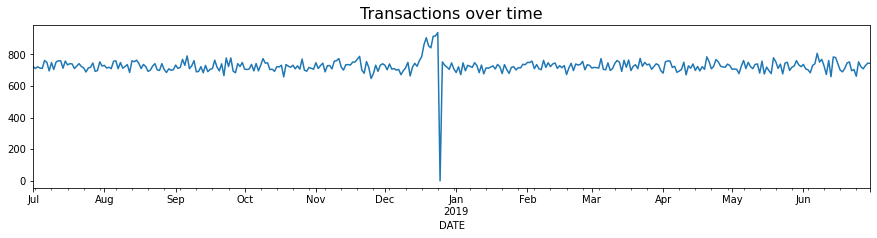

In [32]:
# plot transactions over time

transaction_counts.plot(figsize = (15,3))
plt.title('Transactions over time', fontsize = 16)
plt.savefig('Transactions over time.png', bbox_inches = 'tight')

There is a sharp drop towards the end of Dec-2018, let's zoom in on this. 

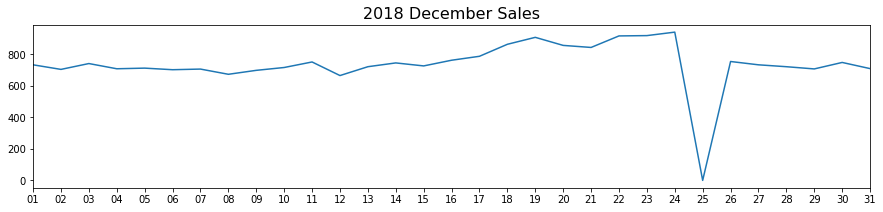

In [33]:
# extract december-2018 sales

dec = transaction_counts[
    (transaction_counts.index >= pd.datetime(2018,12,1)) & 
    (transaction_counts.index < pd.datetime(2019,1,1))].sort_index()

dec.index = dec.index.strftime('%d')

ax = dec.plot(figsize = (15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)

plt.title('2018 December Sales', fontsize = 16)
plt.savefig('2018 December Sales.png', bbox_inches = 'tight')
plt.show()

There were zero sales on 25-Dec-2018 as shops were closed on Christmas.

In [34]:
# check for null values for packaging size

transaction_data['PACK_SIZE'].isnull().values.any()

False

Text(0.5, 1.0, 'Distribution of pack size')

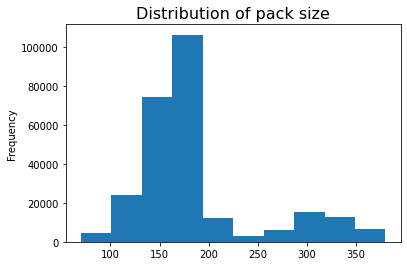

In [35]:
# plot distribution of packaging size

transaction_data['PACK_SIZE'].plot.hist()
plt.title('Distribution of pack size', fontsize = 16)

In [36]:
# extract the brand names, which is the first word of the prodict name

brands = transaction_data['PROD_NAME_SPLIT'].str[0].value_counts().sort_index()
brands

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME_SPLIT, dtype: int64

There are similar brand names like 'Dorito' and 'Doritos' but are classified differently. Let's clean this up.

#### Similar brand names: <br>
Dorito and Doritos <br>
Grain and GrnWves <br>
Infuzions and Infzna <br>
NCC (Natural Chip Co.) and Natural <br>
RRD (Red Rock Deli) and Red <br>
Smith and Smiths <br>
Snbts and Sunbites <br>
WW and Woolworths

In [37]:
# store brand names in another column

transaction_data['BRANDS'] = transaction_data['PROD_NAME_SPLIT'].str[0]

In [38]:
# function to clean the brand names

def cleaned_brands(df):
    
    brand = df['BRANDS']
    
    if brand == 'Dorito':
        return 'Doritos'
    
    elif brand == 'GrnWves' or brand == 'Grain':
        return 'Grain Waves'
    
    elif brand == 'Infzns':
        return 'Infuzions'
    
    elif brand == 'Natural' or brand == 'NCC':
        return 'Natural Chip Co'
    
    elif brand == 'Red':
        return 'RRD'
    
    elif brand == 'Smith':
        return 'Smiths'
    
    elif brand == 'Snbts':
        return 'Sunbites'
    
    elif brand == 'WW':
        return 'Woolworths'
    
    else:
        return brand

In [39]:
# apply cleaned_brands functions

transaction_data["BRANDS"] = transaction_data.apply(lambda x: cleaned_brands(x), axis = 1)

In [40]:
transaction_data['BRANDS'].value_counts()

Kettle             41288
Smiths             31823
Doritos            28145
Pringles           25102
RRD                17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old                 9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: BRANDS, dtype: int64

The brand names looks better now!

In [41]:
# join purch_data and transaction_data based on the LYLTY_CARD_NBR

merged_data = pd.merge(purch_data, transaction_data, on = 'LYLTY_CARD_NBR', how = 'right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE,BRANDS
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,"[Natural, Chip, Compny, SeaSalt]",175.0,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,"[Red, Rock, Deli, Chikn, Garlic, Aioli]",150.0,RRD
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,"[Grain, Waves, Sour, Cream, Chives]",210.0,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,"[Natural, ChipCo, Hony, Soy, Chckn]",175.0,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,"[WW, Original, Stacked, Chips]",160.0,Woolworths


In [42]:
merged_data.shape

(264834, 13)

In [43]:
# check for null values

merged_data['LYLTY_CARD_NBR'].isnull().sum()

0

In [44]:
# save merged dataset to a csv file

merged_data.to_csv('full_customer_data.csv')

#### Exploratory Data Analysis

In [45]:
# total sales by PREMIUM_CUSTOMER

merged_data[['TOT_SALES', 
             'PREMIUM_CUSTOMER']].groupby('PREMIUM_CUSTOMER').sum().sort_values('TOT_SALES', 
                                                                                ascending = False)

,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,750744.50
Budget,676211.55
Premium,506158.95


In [46]:
# total sales by LIFESTAGE

merged_data[['TOT_SALES', 'LIFESTAGE']].groupby('LIFESTAGE').sum().sort_values('TOT_SALES', ascending = False)

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
OLDER FAMILIES,352467.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


In [47]:
# total sales by LIFESTAGE and PREMIUM_CUSTOMER

sales_breakdown = merged_data[['LIFESTAGE', 
                               'PREMIUM_CUSTOMER', 
                               'TOT_SALES']].groupby(
                                            ['PREMIUM_CUSTOMER', 
                                             'LIFESTAGE']).sum().sort_values('TOT_SALES', 
                                                                             ascending = False).reset_index()

Text(0.5, 1.0, 'Breakdown of Total Sales')

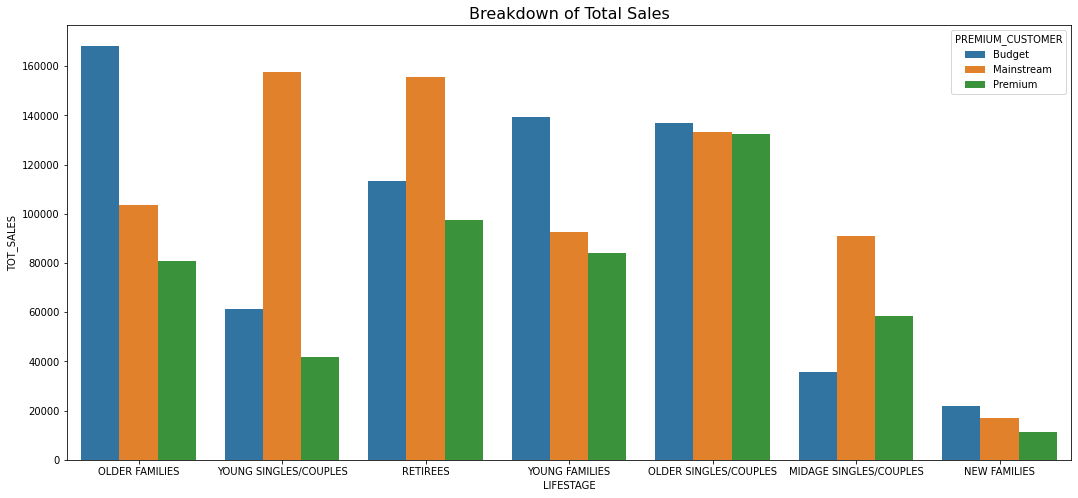

In [48]:
# plot breakdown of total sales by LIFESTAGE and PREMIUM_CUSTOMER

plt.figure(figsize = (18,8))
sns.barplot(y = sales_breakdown['TOT_SALES'], 
            x = sales_breakdown['LIFESTAGE'], 
            hue = sales_breakdown['PREMIUM_CUSTOMER'])

plt.title('Breakdown of Total Sales', fontsize = 16)

Text(0.5, 1.0, 'Breakdown of Customers')

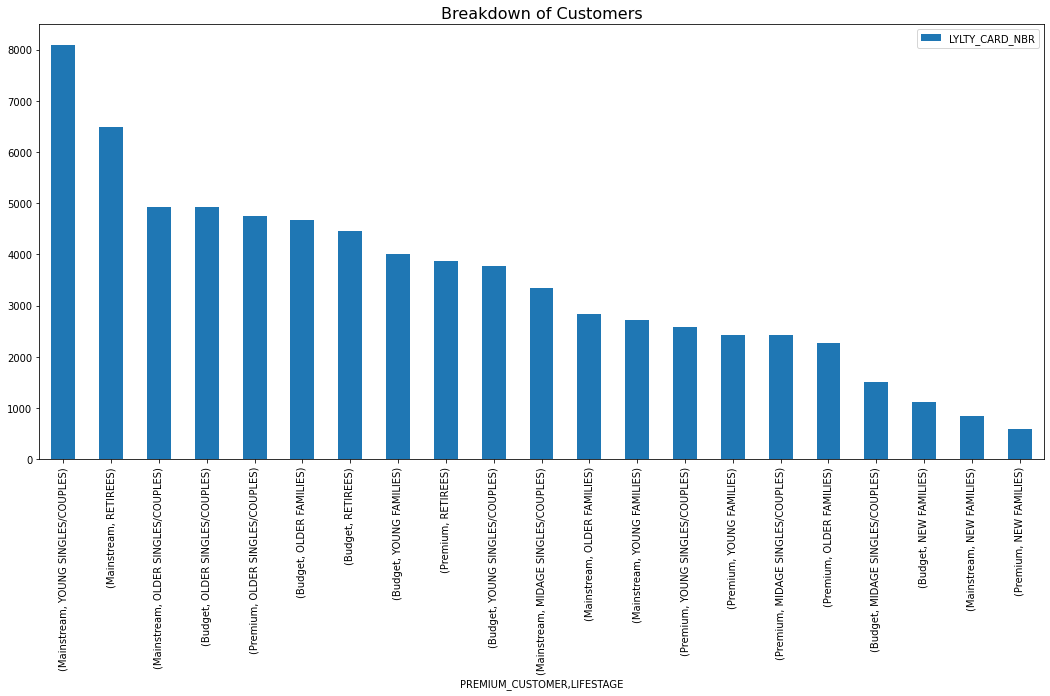

In [49]:
# total customers by LIFESTAGE and PREMIUM_CUSTOMER

purch_data.groupby(['PREMIUM_CUSTOMER', 
                    'LIFESTAGE']).count().sort_values(by = 'LYLTY_CARD_NBR', 
                                                      ascending = False).plot.bar(figsize = (18,8))

plt.title('Breakdown of Customers', fontsize = 16)

In [50]:
# total customers by LIFESTAGE and PREMIUM_CUSTOMER

customer_count = purch_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).count().reset_index()
customer_count.columns = ['PREMIUM_CUSTOMER', 'LIFESTAGE', 'CUSTOMER_COUNT']
customer_count.sort_values('CUSTOMER_COUNT', ascending = False)

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT
13,Mainstream,YOUNG SINGLES/COUPLES,8088
11,Mainstream,RETIREES,6479
10,Mainstream,OLDER SINGLES/COUPLES,4930
3,Budget,OLDER SINGLES/COUPLES,4929
17,Premium,OLDER SINGLES/COUPLES,4750
2,Budget,OLDER FAMILIES,4675
4,Budget,RETIREES,4454
5,Budget,YOUNG FAMILIES,4017
18,Premium,RETIREES,3872
6,Budget,YOUNG SINGLES/COUPLES,3779


In [51]:
# join sales_breakdown and customer_count based on LIFESTAGE and PREMIUM_CUSTOMER

sales_overview = pd.merge(sales_breakdown, 
                          customer_count, 
                          on = ['PREMIUM_CUSTOMER', 'LIFESTAGE'], 
                          how = 'right')

In [52]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT
0,Budget,OLDER FAMILIES,168363.25,4675
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088
2,Mainstream,RETIREES,155677.05,6479
3,Budget,YOUNG FAMILIES,139345.85,4017
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750
7,Budget,RETIREES,113147.80,4454
8,Mainstream,OLDER FAMILIES,103445.55,2831
9,Premium,RETIREES,97646.05,3872


In [53]:
# total transactions by LIFESTAGE and PREMIUM_CUSTOMER

transaction_counts = merged_data[['LIFESTAGE', 
                                  'PREMIUM_CUSTOMER', 
                                  'PROD_QTY']].groupby(
                                              ['PREMIUM_CUSTOMER', 
                                               'LIFESTAGE']).sum().sort_values('PROD_QTY', 
                                                                               ascending = False).reset_index()

transaction_counts.columns = ['PREMIUM_CUSTOMER','LIFESTAGE','TOTAL_PROD_QTY']

In [54]:
transaction_counts.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOTAL_PROD_QTY
0,Budget,OLDER FAMILIES,45065
1,Mainstream,RETIREES,40518
2,Mainstream,YOUNG SINGLES/COUPLES,38632
3,Budget,YOUNG FAMILIES,37111
4,Budget,OLDER SINGLES/COUPLES,35220


In [55]:
# join transaction_counts to sales_overview

sales_overview = pd.merge(sales_overview, 
                          transaction_counts, 
                          left_on = ['LIFESTAGE', 'PREMIUM_CUSTOMER'], 
                          right_on = ['LIFESTAGE', 'PREMIUM_CUSTOMER'], 
                          how = 'left')

In [56]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY
0,Budget,OLDER FAMILIES,168363.25,4675,45065
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088,38632
2,Mainstream,RETIREES,155677.05,6479,40518
3,Budget,YOUNG FAMILIES,139345.85,4017,37111
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930,34997
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986
7,Budget,RETIREES,113147.80,4454,28764
8,Mainstream,OLDER FAMILIES,103445.55,2831,27756
9,Premium,RETIREES,97646.05,3872,24884


Budget - Older Families, despite not having one of the highest customer counts, attributed for the highest total sales. This is due to them buying in large quantities per order. <br>
New Families are the lowest sales contributor as they make up the smallest group of customers.

In [57]:
# average qty sold per customer

sales_overview['AVERAGE_QTY/CUSTOMER'] = sales_overview['TOTAL_PROD_QTY']/sales_overview['CUSTOMER_COUNT']

# sort based on AVERAGE_QTY/CUSTOMER

sales_overview.sort_values('AVERAGE_QTY/CUSTOMER', ascending = False, inplace = True)

In [58]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY,AVERAGE_QTY/CUSTOMER
8,Mainstream,OLDER FAMILIES,103445.55,2831,27756,9.804309
0,Budget,OLDER FAMILIES,168363.25,4675,45065,9.639572
13,Premium,OLDER FAMILIES,80658.40,2274,21771,9.573879
3,Budget,YOUNG FAMILIES,139345.85,4017,37111,9.238486
12,Premium,YOUNG FAMILIES,84025.50,2433,22406,9.209207
10,Mainstream,YOUNG FAMILIES,92788.75,2728,25044,9.180352
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986,7.154947
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220,7.145466
5,Mainstream,OLDER SINGLES/COUPLES,133393.80,4930,34997,7.098783
11,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,3340,22699,6.796108


We can see that older and young families tend to buy more chips per customer.

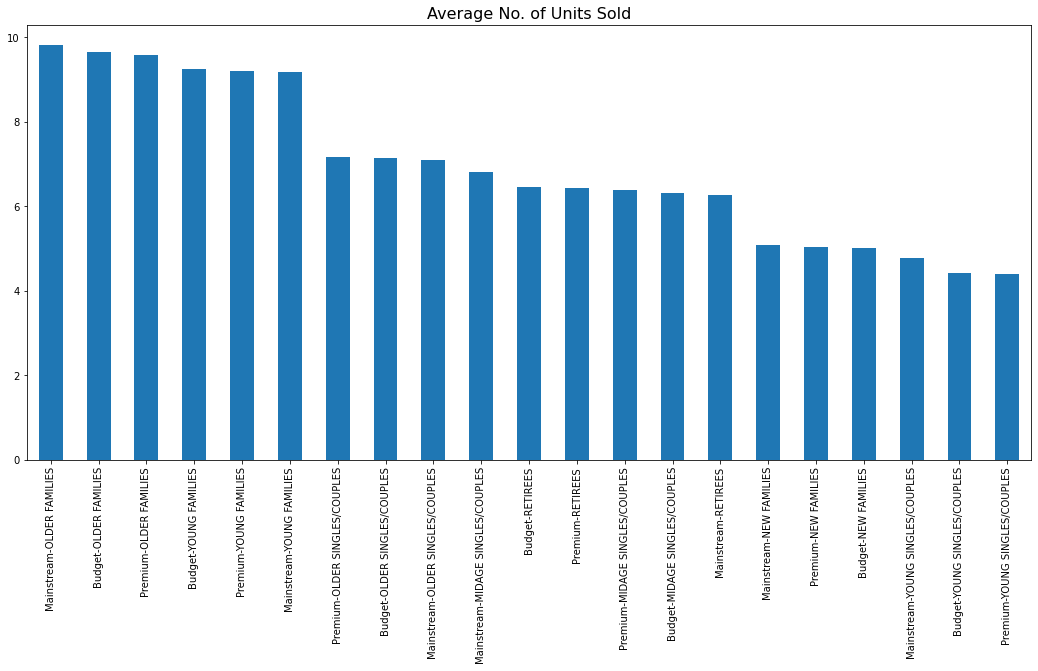

In [59]:
# define xtick labels

xticks = []
for i in sales_overview.index:
    xticks.append(str(sales_overview['PREMIUM_CUSTOMER'][i] + '-' + sales_overview['LIFESTAGE'][i]))

# plot Average No. of Units Sold

sales_overview['AVERAGE_QTY/CUSTOMER'].plot.bar(figsize = (18,8))
plt.title('Average No. of Units Sold', fontsize = 16)

plt.xticks(np.arange(21), xticks);

In [60]:
# average price per unit sold

sales_overview['AVERAGE_PRICE/UNIT'] = sales_overview['TOT_SALES']/sales_overview['TOTAL_PROD_QTY']

# sort based on AVERAGE_PRICE/UNIT

sales_overview.sort_values('AVERAGE_PRICE/UNIT', ascending = False, inplace = True)

In [61]:
sales_overview

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,CUSTOMER_COUNT,TOTAL_PROD_QTY,AVERAGE_QTY/CUSTOMER,AVERAGE_PRICE/UNIT
1,Mainstream,YOUNG SINGLES/COUPLES,157621.60,8088,38632,4.776459,4.080079
11,Mainstream,MIDAGE SINGLES/COUPLES,90803.85,3340,22699,6.796108,4.000346
19,Mainstream,NEW FAMILIES,17013.90,849,4319,5.087161,3.939315
18,Budget,NEW FAMILIES,21928.45,1112,5571,5.009892,3.936178
7,Budget,RETIREES,113147.80,4454,28764,6.458015,3.933660
9,Premium,RETIREES,97646.05,3872,24884,6.426653,3.924050
6,Premium,OLDER SINGLES/COUPLES,132263.15,4750,33986,7.154947,3.891695
20,Premium,NEW FAMILIES,11491.10,588,2957,5.028912,3.886067
4,Budget,OLDER SINGLES/COUPLES,136769.80,4929,35220,7.145466,3.883299
2,Mainstream,RETIREES,155677.05,6479,40518,6.253743,3.842170


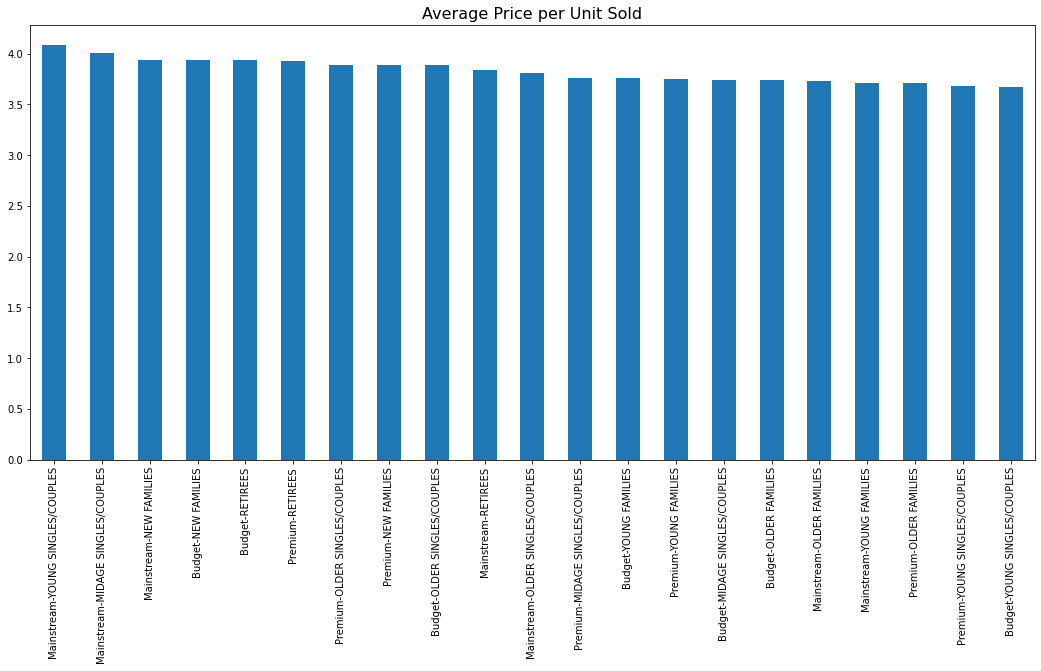

In [62]:
# define xtick labels

xticks = []
for i in sales_overview.index:
    xticks.append(str(sales_overview['PREMIUM_CUSTOMER'][i] + '-' + sales_overview['LIFESTAGE'][i]))

# plot Average Price per Unit Sold'

sales_overview['AVERAGE_PRICE/UNIT'].sort_values(ascending = False).plot.bar(figsize = (18,8))
plt.title('Average Price per Unit Sold', fontsize = 16)

plt.xticks(np.arange(21), xticks);

There is not much difference between the average price per unit sold, with a range of only $0.412. <br>
Let's confirm this with a t-test.

We will conduct a t-test between mainstream midage & young singles/couples vs premium or budget midage & young singles/couples based on the average price per unit sold.

- Null hypothesis - There is no significant difference in the average price per unit sold.
- Alternative hypothesis - There is a significant difference in the average price per unit sold.

- Significance level (alpha) - 5%

In [63]:
from scipy.stats import ttest_ind

In [64]:
mainstream = sales_overview['PREMIUM_CUSTOMER'] == 'Mainstream'
young_midage = (sales_overview['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (sales_overview['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')

budget_premium = (sales_overview['PREMIUM_CUSTOMER'] == 'Budget') | (sales_overview['PREMIUM_CUSTOMER'] == 'Premium')

a = sales_overview[young_midage & mainstream]['AVERAGE_PRICE/UNIT']
b = sales_overview[young_midage & budget_premium]['AVERAGE_PRICE/UNIT']

ttest_ind(a.values, b.values, equal_var = False)

Ttest_indResult(statistic=7.081639382809789, pvalue=0.026815318696277193)

The t-test results in a p-value of 0.027 (< 0.05), i.e. the unit price for mainstream, young and mid-age singles and couples are not significantly higher than that of budget or premium, young and midage singles and couples.

Let's see if there is favourite brand amongst the customers.

In [65]:
# get mode in brands per customer segment

merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['BRANDS'].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream          Kettle
OLDER SINGLES/COUPLES   Budget              Kettle
YOUNG SINGLES/COUPLES   Premium          

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle       3844
Doritos      2541
Pringles     2315
Smiths       1988
Infuzions    1250
Name: BRANDS, dtype: int64


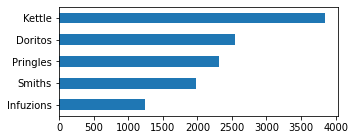

In [66]:
# get top 5 brands for Mainstream - Young Singles and Couples

for i in merged_data['LIFESTAGE'].unique():
    for j in merged_data['PREMIUM_CUSTOMER'].unique():
        
        if i == 'YOUNG SINGLES/COUPLES' and j == 'Mainstream':
            
            print('==========',i, '-', j,'==========')
            summary = merged_data[
                     (merged_data['LIFESTAGE'] == i) & 
                     (merged_data['PREMIUM_CUSTOMER'] == j)]['BRANDS'].value_counts(ascending = False).head()
            
            print(summary)
            summary.sort_values(ascending = True).plot.barh(figsize=(5,2))
            plt.show()

Seems like 'Kettle' is a top favourite amongst all customer segments except for:

- Premium - Older Families
- Budget - Young Singles/Couples

Let's run an a-priori analysis for Mainstream - Young Singles and Couples to confirm our findings above.

In [67]:
from mlxtend.frequent_patterns import apriori, association_rules

In [68]:
# create a 'SEGMENTS' column

merged_data['SEGMENTS'] = merged_data['PREMIUM_CUSTOMER'] + '-' + merged_data['LIFESTAGE']

In [69]:
# create a copy of the merged dataset

merged = merged_data.copy()

In [70]:
merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_SPLIT,PACK_SIZE,BRANDS,SEGMENTS
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,"[Natural, Chip, Compny, SeaSalt]",175.0,Natural Chip Co,Premium-YOUNG SINGLES/COUPLES
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn Garlic Aioli 150g,1,2.7,"[Red, Rock, Deli, Chikn, Garlic, Aioli]",150.0,RRD,Mainstream-YOUNG SINGLES/COUPLES
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream Chives 210G,1,3.6,"[Grain, Waves, Sour, Cream, Chives]",210.0,Grain Waves,Budget-YOUNG FAMILIES
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,"[Natural, ChipCo, Hony, Soy, Chckn]",175.0,Natural Chip Co,Budget-YOUNG FAMILIES
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,"[WW, Original, Stacked, Chips]",160.0,Woolworths,Mainstream-OLDER SINGLES/COUPLES


In [71]:
# function to classify non-'Mainstream-YOUNG SINGLES/COUPLES' as 'others'

def label(item):
    if item == 'Mainstream-YOUNG SINGLES/COUPLES':
        return item
    else:
        return 'Others'

In [72]:
merged['SEGMENTS'] = merged['SEGMENTS'].apply(label)

In [73]:
# check resulting dataframe

merged['SEGMENTS'].value_counts()

Others                              243980
Mainstream-YOUNG SINGLES/COUPLES     20854
Name: SEGMENTS, dtype: int64

In [74]:
# create a model using one hot encoding 

model = pd.concat([pd.get_dummies(merged['SEGMENTS']), pd.get_dummies(merged['BRANDS'])], axis = 1)

model.head()

,Mainstream-YOUNG SINGLES/COUPLES,Others,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,...,Old,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
# run a-priori analysis

freq_items = apriori(model, min_support = 0.005, use_colnames = True)
rules = association_rules(freq_items, metric = 'lift', min_threshold = 1)
rules = rules.sort_values(['antecedent support', 'confidence', 'lift'], ascending = [False, False, False])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(Others),(Smiths),0.921256,0.120162,0.112655,0.122285,1.017664,0.001955,1.002418
18,(Others),(RRD),0.921256,0.067133,0.063474,0.068899,1.026313,0.001627,1.001897
24,(Others),(Woolworths),0.921256,0.055722,0.053460,0.058029,1.041414,0.002126,1.002450
16,(Others),(Natural Chip Co),0.921256,0.028203,0.026715,0.028998,1.028214,0.000733,1.000819
8,(Others),(CCs),0.921256,0.017184,0.016346,0.017743,1.032524,0.000515,1.000569
12,(Others),(Cheezels),0.921256,0.017381,0.016074,0.017448,1.003881,0.000062,1.000069
22,(Others),(Sunbites),0.921256,0.011358,0.010875,0.011804,1.039284,0.000411,1.000452
10,(Others),(Cheetos),0.921256,0.011052,0.010425,0.011317,1.023913,0.000243,1.000267
6,(Others),(Burger),0.921256,0.005906,0.005671,0.006156,1.042444,0.000231,1.000252
14,(Others),(French),0.921256,0.005354,0.005060,0.005492,1.025765,0.000127,1.000139


The results of the apriori analysis confirms our findings above. Mainstream-YOUNG SINGLES/COUPLES customers tend to buy 'Kettle' chips over other brands. 

In [76]:
# create a model for pack-size

model = pd.concat([pd.get_dummies(merged['SEGMENTS']), pd.get_dummies(merged['PACK_SIZE'])], axis = 1)

model.head()

,Mainstream-YOUNG SINGLES/COUPLES,Others,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,...,180.0,190.0,200.0,210.0,220.0,250.0,270.0,300.0,330.0,380.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# run a-priori analysis

freq_items = apriori(model, min_support = 0.005, use_colnames = True)
rules = association_rules(freq_items, metric = 'lift', min_threshold = 1)
rules = rules.sort_values(['antecedent support', 'confidence', 'lift'], ascending = [False, False, False])

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Others),(175.0),0.921256,0.250685,0.231817,0.251631,1.003773,0.000871,1.001264
12,(Others),(150.0),0.921256,0.162861,0.150623,0.163497,1.003908,0.000586,1.000761
16,(Others),(165.0),0.921256,0.057761,0.053600,0.058181,1.007276,0.000387,1.000446
28,(Others),(300.0),0.921256,0.057266,0.052927,0.057451,1.003237,0.000171,1.000197
24,(Others),(200.0),0.921256,0.016890,0.016214,0.017600,1.042036,0.000654,1.000723
8,(Others),(90.0),0.921256,0.011358,0.010875,0.011804,1.039284,0.000411,1.000452
22,(Others),(190.0),0.921256,0.011309,0.010750,0.011669,1.031835,0.000332,1.000364
14,(Others),(160.0),0.921256,0.011215,0.010731,0.011648,1.038693,0.000400,1.000439
26,(Others),(220.0),0.921256,0.005906,0.005671,0.006156,1.042444,0.000231,1.000252
6,(Others),(70.0),0.921256,0.005690,0.005452,0.005919,1.040096,0.000210,1.000230


As for packaging size, Mainstream-YOUNG SINGLES/COUPLES customer tend to prefer 134g.